In [1]:
import pandas as pd 
import numpy as np 
import nltk 
import re
import string
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

from sklearn import tree

from imblearn.over_sampling import SMOTE
from collections import Counter

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import collections, numpy

In [3]:
df= pd.read_csv('Twitter_Emotion_Dataset.csv') 

In [4]:
print("Missing dataset value in all : ",df.isnull().values.any())

Missing dataset value in all :  False


In [5]:
df.head()

,label,tweet
0,anger,"Soal jln Jatibaru,polisi tdk bs GERTAK gubernu..."
1,anger,"Sesama cewe lho (kayaknya), harusnya bisa lebi..."
2,happy,Kepingin gudeg mbarek Bu hj. Amad Foto dari go...
3,anger,"Jln Jatibaru,bagian dari wilayah Tn Abang.Peng..."
4,happy,"Sharing pengalaman aja, kemarin jam 18.00 bata..."


In [6]:
df.shape

(4401, 2)

In [7]:
print('Jumlah kolom pada dataset:  ', len(df.columns))
print('Jumlah baris pada dataset:  ', len(df))

Jumlah kolom pada dataset:   2
Jumlah baris pada dataset:   4401


C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


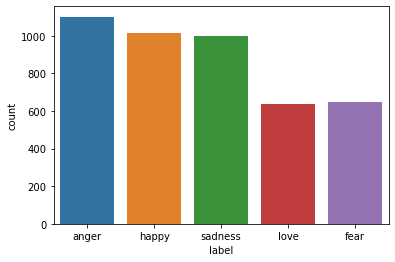

In [8]:
sns.countplot(df['label'],label="Count") #Grafik pada kolom label
plt.show() 

In [9]:
collections.Counter(df['label'])

Counter({'anger': 1101,
         'happy': 1017,
         'sadness': 997,
         'love': 637,
         'fear': 649})

In [10]:
def case_folding(tweet):  
    tweet = tweet.lower()
    
    return tweet
df['tweet']= df['tweet'].apply(case_folding)  

In [11]:
df.head()

,label,tweet
0,anger,"soal jln jatibaru,polisi tdk bs gertak gubernu..."
1,anger,"sesama cewe lho (kayaknya), harusnya bisa lebi..."
2,happy,kepingin gudeg mbarek bu hj. amad foto dari go...
3,anger,"jln jatibaru,bagian dari wilayah tn abang.peng..."
4,happy,"sharing pengalaman aja, kemarin jam 18.00 bata..."


In [12]:
df['tweet'][2]

'kepingin gudeg mbarek bu hj. amad foto dari google, sengaja, biar teman-teman jg membayangkannya. berbagi itu indah.'

In [13]:
def clean_tweet(tweet):
    
    # remove special characters 
    tweet = re.sub('[^ a-zA-Z0-9]', ' ', tweet)
    
    # remove number
    tweet = re.sub(r'[0-9]+', '', tweet)
    
    #remove url 
    tweet = re.sub("url", "", tweet)
    
    #remove username 
    tweet = re.sub('username', '', tweet)
    
    #remove sensitiveno
    tweet = re.sub('sensitiveno', '', tweet)
    
    #remove URL 
    tweet = re.sub("https", "", tweet)
    
    # remove askfm
    tweet = re.sub('askfm', '', tweet)
    
    #remove double spasi
    tweet= " ".join(tweet.split())    
    return tweet
df['tweet']= df['tweet'].apply(clean_tweet)

In [14]:
df['tweet'][2]

'kepingin gudeg mbarek bu hj amad foto dari google sengaja biar teman teman jg membayangkannya berbagi itu indah'

In [15]:
key_norm = pd.read_csv('kamus_normalisasi.csv')

def normalisasi(tweet):
    tweet = ' '.join([key_norm[key_norm['singkat'] == word]['hasil'].values[0] 
                      if (key_norm["singkat"] == word).any() else word for word in tweet.split()])
    return tweet
df['tweet']= df['tweet'].apply(normalisasi)

In [16]:
df['tweet'][2]

'ingin gudeg mbarek bu hj amad foto dari google sengaja biar teman teman juga membayangkannya berbagi itu indah'

In [17]:
text = df['tweet'].values
y = df['label'].values

In [18]:
text.shape

(4401,)

# Bag of Word

In [19]:
# Unigram
bow = CountVectorizer()
X_bow = bow.fit_transform(text)

In [20]:
X_train_bow,X_test_bow,y_train_bow,y_test_bow= train_test_split(X_bow, y,test_size=0.1,random_state=0,stratify=y)

In [21]:
counter = Counter(y_train_bow)
print('Jumlah',counter)

Jumlah Counter({'anger': 991, 'happy': 915, 'sadness': 897, 'fear': 584, 'love': 573})


In [22]:
counter = Counter(y_test_bow)
print('Jumlah',counter)

Jumlah Counter({'anger': 110, 'happy': 102, 'sadness': 100, 'fear': 65, 'love': 64})


In [23]:
print(X_train_bow.shape)
print(X_test_bow.shape)
print(y_train_bow.shape)
print(y_test_bow.shape)

(3960, 17063)
(441, 17063)
(3960,)
(441,)


In [24]:
#Multinomial Naive Bayes dengan bag of word tanpa SMOTE
params = {
            'alpha': [0.01,0.1, 0.5,0.9,1.5,5.0]
         }
grid_search_cv = GridSearchCV(MultinomialNB(), params, cv= 10, verbose=3)

grid_search_cv.fit(X_train_bow, y_train_bow)

#Printing the best hyperparameters
print('The best hyper parameters are: \n',grid_search_cv.best_params_)

Fitting 10 folds for each of 6 candidates, totalling 60 fits
[CV 1/10] END .......................alpha=0.01;, score=0.616 total time=   0.0s
[CV 2/10] END .......................alpha=0.01;, score=0.553 total time=   0.0s
[CV 3/10] END .......................alpha=0.01;, score=0.601 total time=   0.0s
[CV 4/10] END .......................alpha=0.01;, score=0.571 total time=   0.0s
[CV 5/10] END .......................alpha=0.01;, score=0.588 total time=   0.0s
[CV 6/10] END .......................alpha=0.01;, score=0.576 total time=   0.0s
[CV 7/10] END .......................alpha=0.01;, score=0.573 total time=   0.0s
[CV 8/10] END .......................alpha=0.01;, score=0.571 total time=   0.0s
[CV 9/10] END .......................alpha=0.01;, score=0.621 total time=   0.0s
[CV 10/10] END ......................alpha=0.01;, score=0.581 total time=   0.0s
[CV 1/10] END ........................alpha=0.1;, score=0.649 total time=   0.0s
[CV 2/10] END ........................alpha=0.1;

# Multinomial Naive Bayes

In [25]:
MNB3 = MultinomialNB(alpha=0.9)
MNB3.fit(X_train_bow, y_train_bow) 

MultinomialNB(alpha=0.9)

In [26]:
# Evaluasi training tiap skenario dengan 10-Fold CV
scoring = ['accuracy','precision_macro','recall_macro','f1_macro']
score1 = cross_validate(MNB3, X_train_bow, y_train_bow, cv=10, scoring=scoring)
print("training")
print(" %0.4f"% score1['test_accuracy'].mean())
print(" %0.4f"% score1['test_precision_macro'].mean())
print(" %0.4f"% score1['test_recall_macro'].mean())
print(" %0.4f"% score1['test_f1_macro'].mean())

training
 0.6412
 0.6624
 0.6398
 0.6445


In [27]:
# Pengujian data test dengan confusion matrix 
pred3 = MNB3.predict(X_test_bow)
print("Classification: \n",confusion_matrix(y_test_bow, pred3))
accuracy = accuracy_score(y_test_bow, pred3)
print(' {:.2f}%'.format(accuracy * 100))
precision = precision_score(y_test_bow, pred3, average='macro')
print(' {:.2f}%'.format(precision * 100))
recall = recall_score(y_test_bow, pred3, average='macro')
print(' {:.2f}%'.format(recall * 100))
f1 = f1_score(y_test_bow, pred3, average='macro')
print(' {:.2f}%'.format(f1 * 100))

Classification: 
 [[87  3  3  2 15]
 [14 38  3  3  7]
 [ 9  4 57  7 25]
 [ 1  1 10 45  7]
 [21  7  6  6 60]]
 65.08%
 66.76%
 64.75%
 65.25%


In [28]:
print("MODEL 3               : Multinomial Naive Bayes")
print("Feature Extraction    : Bag of word")
print("Tuning Hyperparameter : alpha=0.9")
print("SMOTE                 : Tidak ")
print("Classification Report: \n",classification_report(y_test_bow, pred3))

MODEL 3               : Multinomial Naive Bayes
Feature Extraction    : Bag of word
Tuning Hyperparameter : alpha=0.9
SMOTE                 : Tidak 
Classification Report: 
               precision    recall  f1-score   support

       anger       0.66      0.79      0.72       110
        fear       0.72      0.58      0.64        65
       happy       0.72      0.56      0.63       102
        love       0.71      0.70      0.71        64
     sadness       0.53      0.60      0.56       100

    accuracy                           0.65       441
   macro avg       0.67      0.65      0.65       441
weighted avg       0.66      0.65      0.65       441



(5.5, -0.5)

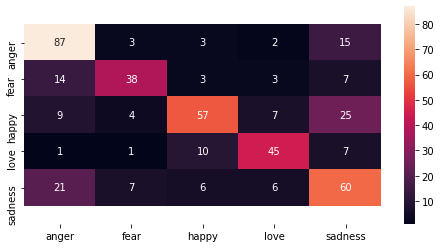

In [29]:
cm = confusion_matrix(y_test_bow, pred3)  
index = ['anger','fear','happy','love','sadness']  
columns = ['anger','fear','happy','love','sadness']  
cm_df = pd.DataFrame(cm,columns,index)                      
plt.figure(figsize=(8,4))  
ax = sns.heatmap(cm_df, annot=True, fmt="g")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# Bigram

In [30]:
#bigram
bigram = CountVectorizer(ngram_range=(2,2),analyzer='word') 
X_bigram = bigram.fit_transform(text)

In [31]:
X_bigram.shape

(4401, 83519)

In [32]:
X_train_bigram,X_test_bigram,y_train_bigram,y_test_bigram= train_test_split(X_bigram, y,test_size=0.1,random_state=0,stratify=y)

In [33]:
print(X_train_bigram.shape)
print(X_test_bigram.shape)
print(y_train_bigram.shape)
print(y_test_bigram.shape)

(3960, 83519)
(441, 83519)
(3960,)
(441,)


In [34]:
counter = Counter(y_train_bigram)
print('Jumlah',counter)

Jumlah Counter({'anger': 991, 'happy': 915, 'sadness': 897, 'fear': 584, 'love': 573})


In [35]:
#Multinomial Naive Bayes dengan bigram tanpa SMOTE
params = {
            'alpha': [0.01,0.1, 0.5,0.9,1.5,5.0]
         }
grid_search_cv = GridSearchCV(MultinomialNB(), params, verbose=3,cv= 10)

grid_search_cv.fit(X_train_bigram, y_train_bigram)

#Printing the best hyperparameters
print('The best hyper parameters are: \n',grid_search_cv.best_params_)

Fitting 10 folds for each of 6 candidates, totalling 60 fits
[CV 1/10] END .......................alpha=0.01;, score=0.419 total time=   0.0s
[CV 2/10] END .......................alpha=0.01;, score=0.414 total time=   0.0s
[CV 3/10] END .......................alpha=0.01;, score=0.389 total time=   0.0s
[CV 4/10] END .......................alpha=0.01;, score=0.442 total time=   0.0s
[CV 5/10] END .......................alpha=0.01;, score=0.455 total time=   0.0s
[CV 6/10] END .......................alpha=0.01;, score=0.417 total time=   0.0s
[CV 7/10] END .......................alpha=0.01;, score=0.422 total time=   0.0s
[CV 8/10] END .......................alpha=0.01;, score=0.399 total time=   0.0s
[CV 9/10] END .......................alpha=0.01;, score=0.402 total time=   0.0s
[CV 10/10] END ......................alpha=0.01;, score=0.442 total time=   0.0s
[CV 1/10] END ........................alpha=0.1;, score=0.414 total time=   0.0s
[CV 2/10] END ........................alpha=0.1;

# Multinomial Naive Bayes

In [36]:
MNB4 = MultinomialNB(alpha=5.0)
MNB4.fit(X_train_bigram, y_train_bigram) 

MultinomialNB(alpha=5.0)

In [37]:
# Evaluasi training tiap skenario dengan 10-Fold CV
scores4 = cross_val_score(MNB4,X_train_bigram, y_train_bigram, cv=10)
print("Multinomial Naive Bayes (Bigram) KFold Train Accuracy",scores4.mean())

Multinomial Naive Bayes (Bigram) KFold Train Accuracy 0.5234848484848484


In [38]:
# Evaluasi training tiap skenario dengan 10-Fold CV
scoring = ['accuracy','precision_macro','recall_macro','f1_macro']
score2 = cross_validate(MNB4, X_train_bigram, y_train_bigram, cv=10, scoring=scoring)
print("training")
print(" %0.4f"% score2['test_accuracy'].mean())
print(" %0.4f"% score2['test_precision_macro'].mean())
print(" %0.4f"% score2['test_recall_macro'].mean())
print(" %0.4f"% score2['test_f1_macro'].mean())

training
 0.5235
 0.5533
 0.5269
 0.5318


In [39]:
pred4 = MNB4.predict(X_test_bigram) # prediksi oleh model
print(" %0.4f" % accuracy_score(y_test_bigram, pred4))
print(" %0.4f" % precision_score(y_test_bigram, pred4, average='macro'))
print(" %0.4f" % recall_score(y_test_bigram, pred4, average='macro'))
print(" %0.4f" % f1_score(y_test_bigram, pred4, average='macro'))
print(confusion_matrix(y_test_bigram, pred4))

 0.5125
 0.5331
 0.5115
 0.5183
[[69  5 14  5 17]
 [16 28  2  1 18]
 [13  6 50  9 24]
 [ 5  3  9 39  8]
 [35  9 11  5 40]]


In [40]:
print("MODEL 4               : Multinomial Naive Bayes")
print("Feature Extraction    : Bigram")
print("Tuning Hyperparameter : alpha=5.0")
print("SMOTE                 : Tidak")
print("Classification Report: \n",classification_report(y_test_bigram, pred4))

MODEL 4               : Multinomial Naive Bayes
Feature Extraction    : Bigram
Tuning Hyperparameter : alpha=5.0
SMOTE                 : Tidak
Classification Report: 
               precision    recall  f1-score   support

       anger       0.50      0.63      0.56       110
        fear       0.55      0.43      0.48        65
       happy       0.58      0.49      0.53       102
        love       0.66      0.61      0.63        64
     sadness       0.37      0.40      0.39       100

    accuracy                           0.51       441
   macro avg       0.53      0.51      0.52       441
weighted avg       0.52      0.51      0.51       441



(5.5, -0.5)

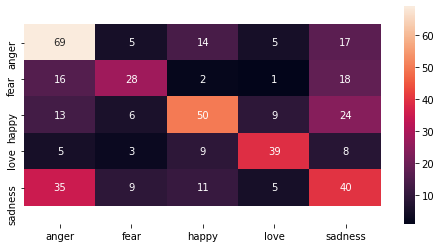

In [41]:
cm = confusion_matrix(y_test_bigram, pred4)  
index = ['anger','fear','happy','love','sadness']  
columns = ['anger','fear','happy','love','sadness']  
cm_df = pd.DataFrame(cm,columns,index)                      
plt.figure(figsize=(8,4))  
ax = sns.heatmap(cm_df, annot=True, fmt="g")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# Pickle model 

In [42]:
import joblib

In [43]:
joblib.dump(MNB4,'model4_HP.pkl')

['model4_HP.pkl']

In [44]:
joblib.dump(MNB3,'model3_HP.pkl')

['model3_HP.pkl']

In [45]:
joblib.dump(bow,'bow.pkl')

['bow.pkl']

In [46]:
joblib.dump(bigram,'bigram.pkl')

['bigram.pkl']

In [48]:
test_msgs = ["Cintailah kekasihmu seperti dia mencintai mu dulu, seperti dia mencintai dengan tulus. Seseorang akan setia pada pasangannya karena cinta suami yang begitu besar pada ibu dan kalian berdua."]
test_msg_counts = bow.transform(test_msgs)

classifications = MNB3.predict_proba(test_msg_counts)
emotion = MNB3.predict(test_msg_counts)

print("emosi",emotion)
classifications


emosi ['love']


array([[7.78772626e-12, 1.59434593e-09, 7.02331732e-10, 9.99996370e-01,
        3.62745793e-06]])

In [52]:
test_msgs = ["Cintailah kekasihmu seperti dia mencintai mu dulu, seperti dia mencintai dengan tulus. Seseorang akan setia pada pasangannya karena cinta suami yang begitu besar pada ibu dan kalian berdua."]
test_msg_counts = bigram.transform(test_msgs)

classifications = model4.predict_proba(test_msg_counts)
emotion = model4.predict(test_msg_counts)

print("emosi",emotion)
classifications


emosi ['love']


array([[9.24939858e-04, 3.77675934e-04, 9.60206824e-04, 9.96547418e-01,
        1.18975902e-03]])

In [ ]:
test_msgs = ["lucu cantik cinta"]
test_msg_counts = trigram.transform(test_msgs)

classifications = mnb3.predict_proba(test_msg_counts)
emotion = mnb3.predict(test_msg_counts)

print("emosi",emotion)
classifications
